<a href="https://colab.research.google.com/github/Alitariq747/Deep-learning-FashionMNIS-clothing-Pytorch/blob/main/PyTorch_computer_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch Computer Vision

## 0. Computer Vision libraries in PyTorch

`torchvision` - base domain library for PyTorch Computer Vision. Visit pytorch official documentation for further insights.
* `torchvision.datasets` - get data sets and data loading functions for computer vision here
* `torchvision.models` - get pretrained computer vision models that you can leverage for your own problems
* `torchvision.transforms` - functions for manipulating your vision data (images) to be suitable for use with an ML model
* `torch.utils.data.Dataset` - base dataset class for PyTorch
* `torch.utils.data.DataLoader` - Creates a Python Iterable over a dataset


In [ ]:
# Import PyTorch
import torch
from torch import nn

# Import torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

# Import matplotlib for visualization
import matplotlib.pyplot as plt

# Check versions
print(torch.__version__)
print(torchvision.__version__)

2.1.0+cu121
0.16.0+cu121


## 1.Getting a dataset
The data set we'll be using is FashionMNIST from torchvision.datasets

Read the docs here : https://pytorch.org/vision/stable/generated/torchvision.datasets.FashionMNIST.html

In [ ]:
# Setting up training data
train_data = datasets.FashionMNIST(root = 'data', # where to download the data
                                   train = True, # do we want the training dataset
                                   download = True, # do we want to download yes/no
                                   transform = torchvision.transforms.ToTensor(), # How do we want to transform input data
                                   target_transform=None) # how do we want to transform the labels/targets

test_data = datasets.FashionMNIST(root = 'data',
                                  train=False,
                                  download=True,
                                  transform=ToTensor(),
                                  target_transform=None)

100%|██████████| 26421880/26421880 [00:02<00:00, 11046697.47it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 205156.44it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3759058.88it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 16842649.76it/s]


Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [ ]:
len(train_data), len(test_data)

(60000, 10000)

In [ ]:
# See the first train item in dataset
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [ ]:
image.shape

torch.Size([1, 28, 28])

In [ ]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [ ]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [ ]:
# Check the shape of our image
print(f'Image shape: {image.shape} -> [color_channels, height, width]')
print(f'Image label: {class_names[label]}')

Image shape: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Image label: Ankle boot


Look how colour channel value is 1 because its a gray scale image. If the image was pure white -> `c` would be 1 and O if color is black

### 1.2 Visualizing our data

Text(0.5, 1.0, 'Label')

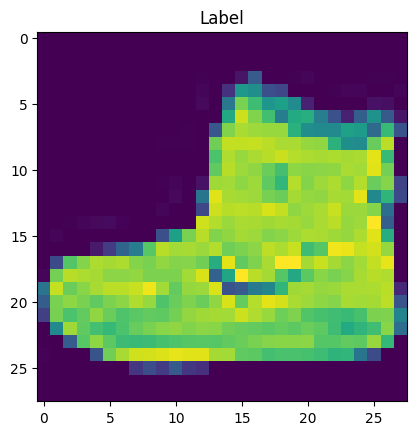

In [ ]:
import matplotlib.pyplot as plt
image, label = train_data[0]
plt.imshow(image.squeeze());
plt.title('Label')

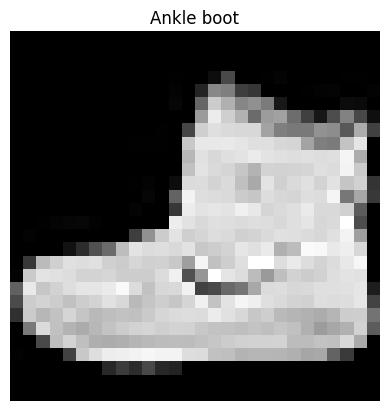

In [ ]:
plt.imshow(image.squeeze(), cmap = 'gray')
plt.title(class_names[label]);
plt.axis(False);

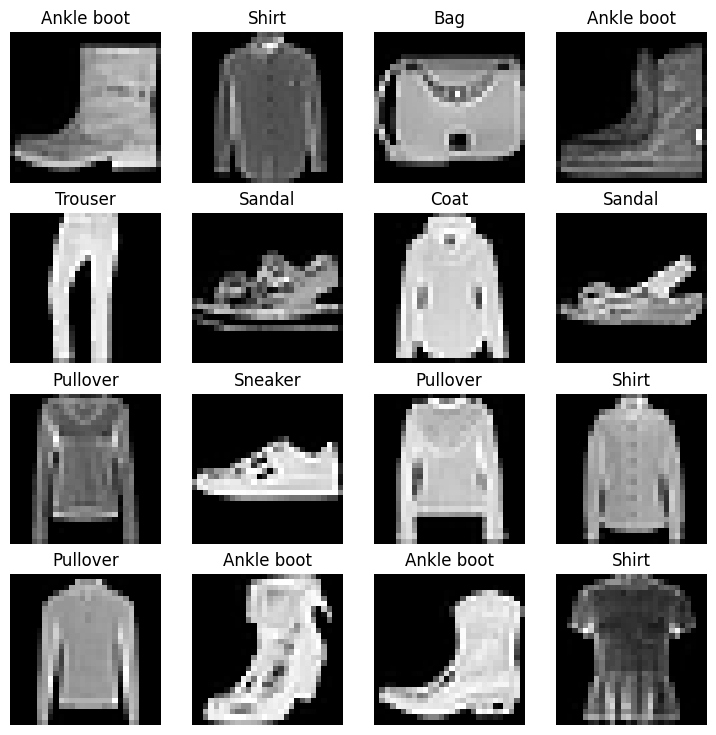

In [ ]:
# Plot more images
torch.manual_seed(42)
fig = plt.figure(figsize = (9,9))
rows, cols = 4, 4
for i in range(1, rows*cols+1):
  random_index = torch.randint(0, len(train_data), size = [1]).item()
  img, label = train_data[random_index]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.squeeze(), cmap = 'gray')
  plt.title(class_names[label])
  plt.axis(False);

Do you think these images of clothing could be modelled with pure linear lines ? or we need non-linearity.?

## 2. Prepare DataLoader

Right now our data is. in the form of PyTorch Datasets.

DataLoader turns our dataset into a Python iterable.

More specifically, we want to turn our data into batches (or mini-batches).

Why we would do this ?

1. It is more computationally efficient as in your computer hardware may not be able to look (store in memory) at 60000 images in one hit. So we break it down to 32 images at a time(batch size of 32)
2. It gives our neural network more chances to update its gradients per epoch.

In [ ]:
from torch.utils.data import DataLoader

# Setup the batch size hyperparameter
BATCH_SIZE = 32

# Turn datasets into iterables(batches)
train_dataloader = DataLoader(dataset = train_data,
                              batch_size = BATCH_SIZE,
                              shuffle = True)

test_dataloader = DataLoader(dataset = test_data,
                             batch_size = BATCH_SIZE,
                             shuffle = False)

## Its a good idea not shuffle the test data as model has never seen our test data.
train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7e11cd01faf0>,
 <torch.utils.data.dataloader.DataLoader at 0x7e11cd3f96f0>)

In [ ]:
# Let's check out what we've created
print(f'DataLoaders: {train_dataloader, test_dataloader}')
print(f'Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}...')
print(f'Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}...')


DataLoaders: (<torch.utils.data.dataloader.DataLoader object at 0x7e11cd01faf0>, <torch.utils.data.dataloader.DataLoader object at 0x7e11cd3f96f0>)
Length of train dataloader: 1875 batches of 32...
Length of test dataloader: 313 batches of 32...


In [ ]:
# Check out what's inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image Size: torch.Size([1, 28, 28])
Label: 6, label size: torch.Size([])


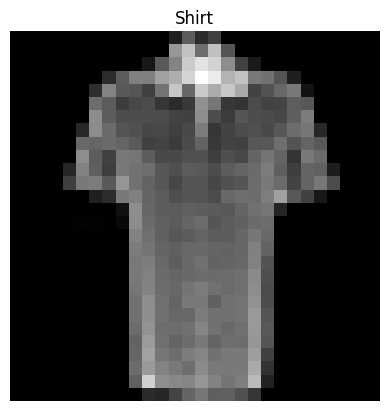

In [ ]:
# Show a sample
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap='gray')
plt.title(class_names[label])
plt.axis(False)
print(f'Image Size: {img.shape}')
print(f'Label: {label}, label size: {label.shape}')

## 3. Model:0 Build a baseline model

When starting to build a series of machine learning modelling experiments, its best practice to start with a baseline model.

A baseline model is a simple model you will try and improve upon with subsequent models/experiments.

In other words: start simply and add complexity when necessary.

In [ ]:
# Create a flatten layer
flatten_model = nn.Flatten()

# Get a single sample
x = train_features_batch[0]

# Flatten the sample
output = flatten_model(x) # Forward pass on our model

# Print what happened
print(f'Shape before flattening: {x.shape} -> [color channels, height, width]')
print(f'Shape after flattening: {output.shape} -> [color channels, height * width]')

Shape before flattening: torch.Size([1, 28, 28]) -> [color channels, height, width]
Shape after flattening: torch.Size([1, 784]) -> [color channels, height * width]


In [ ]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
  def __init__(self, input_shape: int,
               output_shape: int,
               hidden_units: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape, out_features = hidden_units),
        nn.Linear(in_features=hidden_units, out_features = output_shape)
    )

  def forward(self, x):
    return self.layer_stack(x)

Observe here closely -> our x which is our input is a tensor of shape [ C, H, W]. Now our flatten layer would compress it to be a [C, H*W] and that is what goes inside our model.

In [ ]:
torch.manual_seed(42)

# Setup model with input parameters
model_0 = FashionMNISTModelV0(
    input_shape = 784,# 28*28
    output_shape = len(class_names),
    hidden_units = 10
).to('cpu')

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [ ]:
dummy_x = torch.rand([1,1,28,28])
model_0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

In [ ]:
model_0(dummy_x).shape

torch.Size([1, 10])

See above we get a tensor of shape [1,10] ; implying one logit per class. Now what flatten layer does; it compresses our input shape into a single dimensional tensor or a vector to be used by fully functional layers in our network.

In [ ]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('layer_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.

### 3.1 Pick up a loss function optimizer and evaluation metrics.

* Loss function - since we're working with multi-class data, our loss function will be `nn.CrossEntropyLoss()`
* Optimizer - our optimizer `torch.optim.SGD`
* Evaluation metric - Again as its a multiclass classification problem we can use `accuracy` as our evaluation metric.

In [ ]:
# Getting accuracy from helper functions
import requests
from pathlib import Path

# Downloading helper functions from github learn pytorch repo
if Path('helper_functions.py').is_file():
  print('helper_functions.py already exists; skipping download')
else:
  print('Downloading helper_functions.py')
  request = requests.get('https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py')
  with open('helper_functions.py', 'wb') as f:
    f.write(request.content)

In [ ]:
# Import accuracy metric from helper_functions.py
from helper_functions import accuracy_fn

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(params = model_0.parameters(), lr = 0.1)

### 3.2 Creating a function to time our experiments

Machine Learning is very experimental.
Two of the main things you'll often make a trade off b/w and track are:

1. Model's performance (loss and accuracy)
2. How fast it runs

In [ ]:
from timeit import default_timer as timer
def print_train_time(start: float,
                     end: float,
                     device: torch.device = None):
  """
  Prints time differnece between start and end time.
  """
  total_time = end - start
  print(f'Train time on {device}: {total_time:.2f} seconds')
  return total_time

In [ ]:
start_time = timer()
## code here
end_time = timer()
print_train_time(start_time, end_time, 'cpu')

Train time on cpu: 0.00 seconds


5.4737999988674346e-05

### 3.3 Creating a training loop and training a model of batches of data

1. Loop through epochs.
2. Loop through training batches, performs training steps, calculate the train loss *per batch*.
3. Loop through testing batches, performs testing steps, calculate test loss per batch.
4. Print out whats happening
5. Time it all (for fun)

In [ ]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# Set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# Set the number of epochs (we'll keep this small for faster training time)
epochs = 3

# Create training and test loop
for epoch in tqdm(range(epochs)):
  print(f'Epoch: {epoch}\n----')
  ### Training
  train_loss = 0
  # Add a loop to loop through the training batches
  for batch, (X, y) in enumerate(train_dataloader):
    model_0.train()
    # 1. Forward pass
    y_pred = model_0(X)

    # 2 Calculate loss (per batch)
    loss = loss_fn(y_pred, y)
    train_loss += loss

    # 3. Optimzer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ## Observe how we are using training loop inside a batch loop so our model gets more optimized with each batch of data

    # Print out whats happening
    if batch % 400 == 0:
      print(f'Looked at {batch * len(X)} / {len(train_dataloader.dataset)} samples.')

  # Divide total train loss by length
  train_loss /= len(train_dataloader) # Average train loss per epoch

  ### Testing
  test_loss, test_acc = 0, 0
  model_0.eval()
  with torch.inference_mode():
    for X_test, y_test in test_dataloader:
      # 1. Forward pass
      test_pred = model_0(X_test)

      # 2. calculate loss (cumulatively)
      test_loss += loss_fn(test_pred, y_test)

      # 3. calculate accuracy
      test_acc += accuracy_fn(y_true = y_test, y_pred = test_pred.argmax(dim = 1))

    # Calculate the test loss per batch
    test_loss /= len(test_dataloader)

    # Calculate the tes acc per batch
    test_acc /= len(test_dataloader)

  # Print out what's happening
  print(f'\nTrain loss: {train_loss:.4f}, Test loss: {test_loss:.4f}, Test Acc{test_acc:.4f}%')

# Calculate training time
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu,
                                            end=train_time_end_on_cpu,
                                            device=str(next(model_0.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
----
Looked at 0 / 60000 samples.
Looked at 12800 / 60000 samples.
Looked at 25600 / 60000 samples.
Looked at 38400 / 60000 samples.
Looked at 51200 / 60000 samples.

Train loss: 0.5904, Test loss: 0.5095, Test Acc82.0387%
Epoch: 1
----
Looked at 0 / 60000 samples.
Looked at 12800 / 60000 samples.
Looked at 25600 / 60000 samples.
Looked at 38400 / 60000 samples.
Looked at 51200 / 60000 samples.

Train loss: 0.4763, Test loss: 0.4799, Test Acc83.1969%
Epoch: 2
----
Looked at 0 / 60000 samples.
Looked at 12800 / 60000 samples.
Looked at 25600 / 60000 samples.
Looked at 38400 / 60000 samples.
Looked at 51200 / 60000 samples.

Train loss: 0.4550, Test loss: 0.4766, Test Acc83.4265%
Train time on cpu: 33.53 seconds


In [ ]:
str(next(model_0.parameters()).device)

'cpu'

## Make predictions and get Model 0 results

In [ ]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
  """
  Returns a dictionary containing the results of a model predicting on a data_loader.
  """
  model.to(device)
  loss, acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X, y in tqdm(data_loader):
      # Make our data device agnostic
      X, y = X.to(device), y.to(device)
      # Make predictions
      y_pred = model(X)

      # Accumulate loss and acc
      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y_true = y, y_pred = y_pred.argmax(dim = 1))

    # Scale loss and acc to find the average loss / acc per batch
    loss /= len(data_loader)
    acc /= len(data_loader)

  return {'model_name': model.__class__.__name__, # only works if model was created with a class
          'model_loss': loss.item(),
          'model_acc': acc}


model_0_results = eval_model(model = model_0,
                             data_loader = test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn)

model_0_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

## 5. Setup device agnostic code (for using a GPU if there is one)

In [ ]:
# Setup device agnostic code
import torch
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [ ]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [ ]:
torch.cuda.is_available()

False

## 6. Model1: Building a better model with non-linearity.

Remember non-linearity helps us model non-linear data; like circles and make moons dataset from scikit learn.

Remember that linear and non linear lines can model any kind of data if paired correctly.

How do we find the correct pair ?
Well through experimentation..

In [ ]:
# Create a model with non-linear and linear layers
class FashionMNISTModelV1(nn.Module):
  def __init__(self, input_shape: int,
               output_shape: int,
               hidden_units: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
                        nn.Flatten(), # Flattens input into a single vector
                        nn.Linear(in_features=input_shape
                                 , out_features=hidden_units),
                        nn.ReLU(),
                        nn.Linear(in_features = hidden_units,
                                 out_features=output_shape),
                        nn.ReLU()
    )
  def forward(self, x: torch.Tensor):
    return self.layer_stack(x)

In [ ]:
# Create an instance of the model
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(input_shape = 784,
                              output_shape = len(class_names),
                              hidden_units=10).to(device)

In [ ]:
next(model_1.parameters()).device

device(type='cpu')

### Setup loss function and optimizer and evaluation metrics

In [ ]:
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(params = model_1.parameters(),
                            lr = 0.1)

### 6.2 Setup a function for training and evaluating/testing loops

Let's create a function for:
* training loop - train_step()
* testing loop - test_step

In [ ]:
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):

  """
  Performs a training loop over a dataloader
  """


### Training
  model.train()

  train_loss, train_acc = 0 , 0
  # Add a loop to loop through the training batches
  for batch, (X, y) in enumerate(dataloader):

    # Put data on target device
    X, y = X.to(device), y.to(device)
    # 1. Forward pass
    y_pred = model(X)

    # 2a Calculate loss (per batch)
    loss = loss_fn(y_pred, y)
    train_loss += loss

    # 2b Calculate train acc
    train_acc += accuracy_fn(y_true = y, y_pred = y_pred.argmax(dim = 1))

    # 3. Optimzer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ## Observe how we are using training loop inside a batch loop so our model gets more optimized with each batch of data


  # Divide total train loss and acc by length
  train_loss /= len(dataloader) # Average train loss per epoch
  train_acc /= len(dataloader)
  print(f'Train loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%')

In [ ]:
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,

              accuracy_fn,
              device: torch.device = device):

    ### Testing
  test_loss, test_acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X_test, y_test in dataloader:

      # Put data to target device:
      X_test, y_test = X_test.to(device), y_test.to(device)
      # 1. Forward pass
      test_pred = model(X_test)

      # 2. calculate loss (cumulatively)
      test_loss += loss_fn(test_pred, y_test)

      # 3. calculate accuracy
      test_acc += accuracy_fn(y_true = y_test, y_pred = test_pred.argmax(dim = 1))

    # Calculate the test loss per batch
    test_loss /= len(dataloader)

    # Calculate the tes acc per batch
    test_acc /= len(dataloader)

  # Print out what's happening
  print(f' Test Loss: {test_loss:.4f}, Test Acc{test_acc:.4f}%')

### Using out train_step and test_step functions to train and evaluate our model_1

In [ ]:
torch.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_on_gpu = timer()
epochs = 3
for epoch in tqdm(range(epochs)):
  train_step(model = model_1,
             dataloader = train_dataloader,
             loss_fn = loss_fn,
             optimizer = optimizer,
             accuracy_fn=accuracy_fn)
  test_step(model = model_1,
            dataloader=test_dataloader,
            loss_fn = loss_fn,
            accuracy_fn=accuracy_fn
            )

train_time_end_on_gpu = timer()
print_train_time(start=train_time_start_on_gpu,
                   end=train_time_end_on_gpu,
                 device = device)

  0%|          | 0/3 [00:00<?, ?it/s]

Train loss: 1.0920, Train Acc: 61.34%
 Test Loss: 0.9564, Test Acc64.9960%
Train loss: 0.7810, Train Acc: 71.93%
 Test Loss: 0.7223, Test Acc73.9117%
Train loss: 0.6703, Train Acc: 75.94%
 Test Loss: 0.6850, Test Acc75.0200%
Train time on cpu: 47.04 seconds


47.04465733500001

In [ ]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

In [ ]:
# Train time on cpu
total_train_time_model_0

33.53145033999999

> **Note** Sometimes, depending on your data/hardware you might find that your model trains faster on CPU than GPU.
>
> Why is this ?
>
> 1. It could be that the overhead for copying data/model to and from GPU outweighs the compute benefits offered by the GPU.
> 2. The hardware you're using has a better CPU in terms of compute compatibility than GPU

In [ ]:
# Get model_1 results dictionary
model_1_results = eval_model(model=model_1,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn
                             )

  0%|          | 0/313 [00:00<?, ?it/s]

In [ ]:
model_1_results

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6850009560585022,
 'model_acc': 75.01996805111821}

In [ ]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

From the results above we can see that our baseline model(with no non_linear layers) out performed the model_1 (with linear layers)

## Model 2: Building a Convolutional Neural Network (CNN)

CNN's are also known as ConvNets.

CNN's are known for thier capabilities to find patterns in visual data.

To find out what's happening inside a CNN https://poloclub.github.io/cnn-explainer/

In [ ]:
# Create a convolutional neural network
class FashionMNISTModelV2(nn.Module):
  """
  Model architecture that replicates the TinyVGG model from CNN explainer website.
  """
  def __init__(self, input_shape: int, output_shape: int, hidden_units: int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels = input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1), # these are hyperparameters of nn.Conv2d
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = hidden_units * 7 * 7, # there is a trick to get this.
                  out_features = output_shape)
    )
  def forward(self, x):
    x = self.conv_block_1(x)
    # print(f'Output of conv block 1: {x.shape}')
    x = self.conv_block_2(x)
    # print(f'Output of conv block 2: {x.shape}')
    x = self.classifier(x)
    # print(f'Output of classifier layer: {x.shape}')

    return x

In [ ]:
image.shape

torch.Size([1, 28, 28])

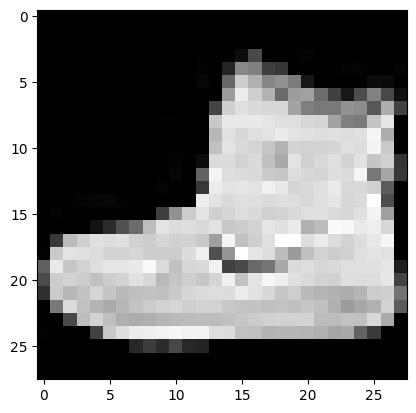

In [ ]:
plt.imshow(image.squeeze(), cmap='gray')

In [ ]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1, # This is the color channels ; could be 3 if we had coloured images.
                              hidden_units=10,
                              output_shape=len(class_names))

In [ ]:
image_tensor = model_2(image.unsqueeze(0))
image_tensor

Output of conv block 1: torch.Size([1, 10, 14, 14])
Output of conv block 2: torch.Size([1, 10, 7, 7])
Output of classifier layer: torch.Size([1, 10])


tensor([[ 0.0246, -0.0644,  0.0551, -0.0360, -0.0139,  0.0113, -0.0014, -0.0075,
          0.0213,  0.0076]], grad_fn=<AddmmBackward0>)

### 7.1 Stepping through nn.Conv2d

In [ ]:
torch.manual_seed(42)

# Create batch of images
images = torch.randn(size=(32,3,64,64))
test_image = images[0]

print(f'image batch shape:{images.shape}')
print(f'Single image shape: {test_image.shape}')
print(f'Test image:\n{test_image}')

image batch shape:torch.Size([32, 3, 64, 64])
Single image shape: torch.Size([3, 64, 64])
Test image:
tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-0.7

In [ ]:
torch.manual_seed(42)

# Create a single conv2d layer
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=3,
                       stride=1,
                       padding=0)

# pass the data through the convolutional layer.
conv_output = conv_layer(test_image)
conv_output.shape

torch.Size([10, 62, 62])

Kernel is basically our filter in a convolutional layer. its 3 which implies 3 x 3 square that goes over each pixel in the input channel and performs some mathematical computation to get an idea of what that pixel represent.

Stride = 1 means our kernel goes over every pixel in the input one by one and if we increase stride to 2; we go to two pixels at a time and increasing stride has the impact of compressing our input. And that compressing is needed because we want to generalize the learned patterns.

Padding is the extra space on the edges. we set it to capture the information around the edges. Its basically an extra pixel on the edges.

### 7.2 Stepping through Maxpool2d

In [ ]:
# Print out original image shape
print(f'Test image original shape: {test_image.shape}')

# Create a sample nn.MaxPool2d layer
max_pool_layer = nn.MaxPool2d(kernel_size = 2)

# Pass data just through the conv2d layer.
image_through_conv_layer = conv_layer(test_image.unsqueeze(0))
print(f'Image shape from passing just through conv layer: {image_through_conv_layer.shape}')

# Pass data from both conv and maxpool2d layer:
image_through_conv_and_maxpool2d_layer = max_pool_layer(image_through_conv_layer)
print(f'Image shape after passing through both conv and maxpool2d layers: {image_through_conv_and_maxpool2d_layer.shape}')

Test image original shape: torch.Size([3, 64, 64])
Image shape from passing just through conv layer: torch.Size([1, 10, 62, 62])
Image shape after passing through both conv and maxpool2d layers: torch.Size([1, 10, 31, 31])


So far what has happened is that our maxpool2d layer compresses the input shape by taking maximum of 2 x 2 kernel applied to the entire dimension of the input tensor.

So if we increase the kernel size we reach our goal (reducing dimensions) but we may also lose efficiency.
Remember our main aim in deep learning is to take input tensors with higher dimensions and compress them into single dimensional vector(our output layer).

In [ ]:
# Set up a random tensor:
torch.manual_seed(42)

random_tensor = torch.randn(size=(1,1,2,2))
print(f'Random Tensor: {random_tensor}')
print(f'Random Tensor shape: {random_tensor.shape}')

# Create a max pool 2d layer
max_pool_layer = nn.MaxPool2d(kernel_size = 2)

max_pool_tensor = max_pool_layer(random_tensor)

print(f'Max pool tensor: {max_pool_tensor}')
print(f'Shape of max pool tensor: {max_pool_tensor.shape}')

Random Tensor: tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])
Random Tensor shape: torch.Size([1, 1, 2, 2])
Max pool tensor: tensor([[[[0.3367]]]])
Shape of max pool tensor: torch.Size([1, 1, 1, 1])


### 7.3 Setup a loss function and optimizer for model_2

In [ ]:
# Setup loss function/eval metrcis and optimizer
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(), lr=0.1)

### 7.4 Training and Testing model_2 using our training and testing functions.

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_model_2_on_cpu = timer()

# Train and test model
epochs = 3
for epoch in tqdm(range(epochs)):
  print(f'Epoch: {epoch}\n-----')
  train_step(model=model_2,
             dataloader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)
  test_step(model=model_2,
            dataloader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)

train_time_end_model_2 = timer()
total_train_time_model_2 = print_train_time(start=train_time_start_model_2_on_cpu,
                                            end=train_time_end_model_2,
                                            device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-----
Train loss: 0.3647, Train Acc: 86.92%
 Test Loss: 0.3555, Test Acc87.0308%
Epoch: 1
-----
Train loss: 0.3265, Train Acc: 88.19%
 Test Loss: 0.3311, Test Acc87.4700%
Epoch: 2
-----
Train loss: 0.3072, Train Acc: 88.88%
 Test Loss: 0.3183, Test Acc88.5184%
Train time on cpu: 147.30 seconds


In [ ]:
# Get the model_2 results
model_2_results = eval_model(model=model_2,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn
                             )
model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3182623088359833,
 'model_acc': 88.51837060702876}

## Compare model results and training time

In [ ]:
import pandas as pd
compare_results = pd.DataFrame([model_0_results,
                                model_1_results,
                                model_2_results])

compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.476639,83.426518
1,FashionMNISTModelV1,0.685001,75.019968
2,FashionMNISTModelV2,0.318262,88.518371


In [ ]:
# Add training time to results comparsion
compare_results['training_time'] = [total_train_time_model_0,
                                    '47.04222',
                                    total_train_time_model_2]

compare_results

,model_name,model_loss,model_acc,training_time
0,FashionMNISTModelV0,0.476639,83.426518,33.53145
1,FashionMNISTModelV1,0.685001,75.019968,47.04222
2,FashionMNISTModelV2,0.318262,88.518371,147.295489


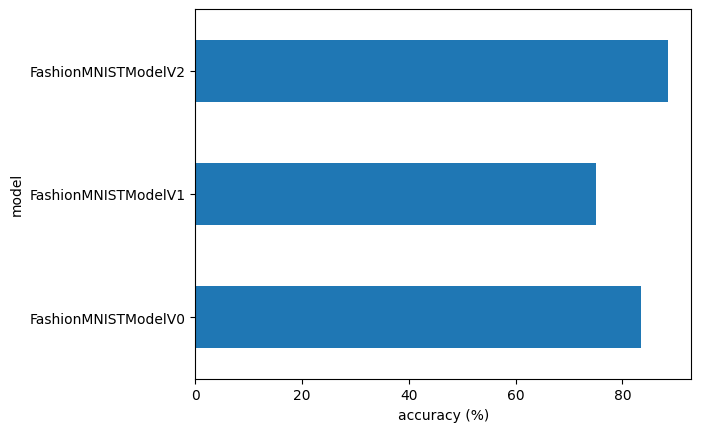

In [ ]:
# Viusalize our model results
compare_results.set_index('model_name')['model_acc'].plot(kind='barh')
plt.xlabel('accuracy (%)')
plt.ylabel('model');

## 9. Make and evaluate random predictions with best model

In [ ]:
def make_predictions(model: torch.nn.Module,
                     data: list,
                     device: torch.device = device):
  pred_probs = []
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for sample in data:
      # Prepare the sample (add a batch dimension and pass to target device)
      sample = torch.unsqueeze(sample, dim=0).to(device)

      # Forward pass
      pred_logit = model(sample)

      # Get prediction probability (logit -> prediction probability)
      pred_prob = torch.softmax(pred_logit.squeeze(), dim = 0)

      # Get pred_prob off GPU for further claclulations
      pred_probs.append(pred_prob.cpu())

  # Stack the pred_probs to turn list into a tensor
  return torch.stack(pred_probs)

In [ ]:
img, label = test_data[0]
img.shape, label

(torch.Size([1, 28, 28]), 9)

In [ ]:
list(test_data)[0][0].shape, list(test_data)[0][1]

(torch.Size([1, 28, 28]), 9)

In [ ]:
import random
# random.seed(42)

test_samples = []
test_labels = []

for sample, label in random.sample(list(test_data), k=9):
  test_samples.append(sample)
  test_labels.append(label)

# View the first sample shape
test_samples[0].shape

torch.Size([1, 28, 28])

In [ ]:
len(test_labels)

9

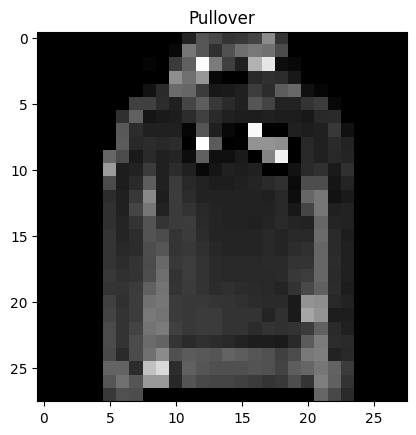

In [ ]:
plt.imshow(test_samples[0].squeeze(), cmap='gray')
plt.title(class_names[test_labels[0]]);

In [ ]:
# make predictions
pred_probs = make_predictions(model=model_2,
                              data=test_samples)

# View the first two prediction probabilities
pred_probs[:2]

tensor([[2.7171e-02, 2.1696e-03, 5.3085e-01, 8.2753e-03, 3.2972e-01, 6.7293e-05,
         6.8921e-02, 8.9243e-05, 3.2652e-02, 9.3702e-05],
        [2.0699e-04, 8.3807e-06, 2.8909e-02, 1.0716e-04, 9.6505e-01, 2.3128e-07,
         3.1929e-03, 3.0786e-06, 2.5160e-03, 1.8148e-06]])

In [ ]:
# Convert Prediction probabilities into actual labels
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([2, 4, 6, 3, 2, 2, 0, 1, 1])

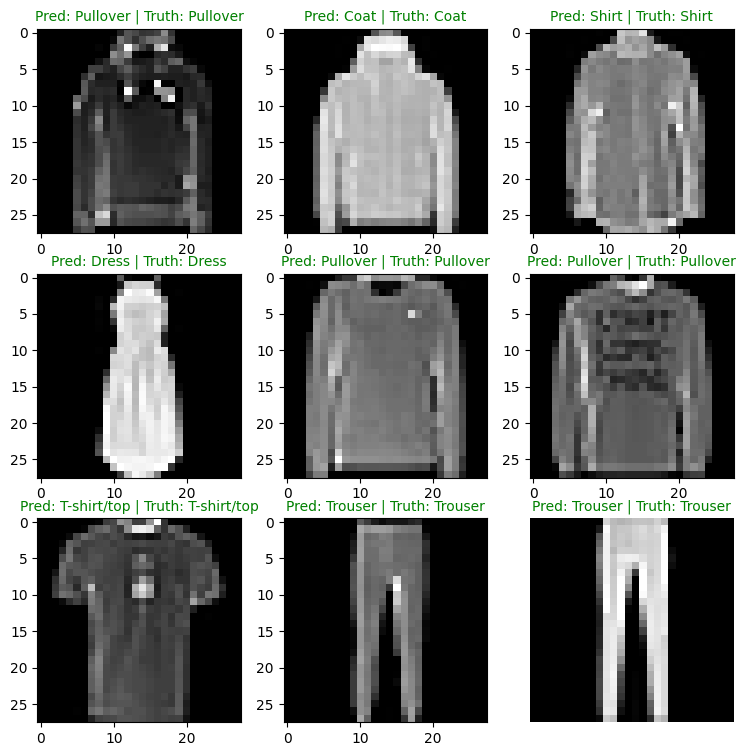

In [ ]:
# Plot Predictions
plt.figure(figsize=(9,9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
  # Create a subplot at i+1 index because matplotlib index starts from 1
  plt.subplot(nrows, ncols, i+1)

  # Plot the target image
  plt.imshow(sample.squeeze(), cmap='gray')

  # Find the prediction in text form (e.g 'sandal')
  pred_label = class_names[pred_classes[i]]

  # Get the truth label in text form
  truth_label = class_names[test_labels[i]]

  # Create a title for the plot
  title_text = f'Pred: {pred_label} | Truth: {truth_label}'

  # Check for equality between pred and truth labels and change color of title text
  if pred_label == truth_label:
    plt.title(title_text, fontsize =10, c = 'g') # green text if prediction was correct
  else:
    plt.title(title_text, fontsize=10, c='r')

plt.axis(False);

## 10. Making a confusion matrix for further prediction evaluation

1. Make predictions with our trained model on the test dataset.
2. Make a confusion matrix from `torchmetrics.ConfusionMatrix.
3. Plot the confusion matrix using `mlxtend.plotting.plot_confusion_matrix().

In [ ]:
# Get tqdm for progress bar

from tqdm.auto import tqdm

# 1. Make predictions on our test data
y_preds = []
model_2.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc='Making Predictions...'):
    # Send data to device
    X, y = X.to(device), y.to(device)
    # Do the forward pass
    y_logits = model_2(X)

    # Turn logits into pred_probs
    y_pred = torch.softmax(y_logits.squeeze(), dim=0).argmax(dim=1)

    # Put predictions on cpu for evaluation
    y_preds.append(y_pred.cpu())

y_preds[0]


Making Predictions...:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 5, 3, 4, 1, 2, 6, 8, 0, 2, 5, 7, 5,
        1, 2, 4, 3, 9, 4, 8, 8])

In [ ]:
y_preds[0].shape

torch.Size([32])

From above we can see that we have a shape of [32] for every prediction implying our model's prediction for every item in the BATCH.

In [ ]:
# Concatenate list of predictions
y_pred_tensor = torch.cat(y_preds)
y_pred_tensor[:2]

tensor([9, 2])

In [ ]:
len(y_pred_tensor)

10000

In [ ]:
# # See if required packages are installed and if not, install them...
try:
  import torchmetrics, mlxtend
  print(f'mlextend version: {mlxtend.__version__}')
  assert int(mlxtend.__version__.split('.')[1]) >= 19, 'mlxtend version should be 0.19.0 higher'
except:
  !pip install torchmetrics -U mlxtend
  import torchmetrics, mlxtend
  print(f'mlxtend version: {mlxtend.__version__}')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 806.1/806.1 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 15.3 MB/s eta 0:00:00
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.22.0
    Uninstalling mlxtend-0.22.0:
      Successfully uninstalled mlxtend-0.22.0
mlxtend version: 0.23.0


In [ ]:
test_data.targets

tensor([9, 2, 1,  ..., 8, 1, 5])

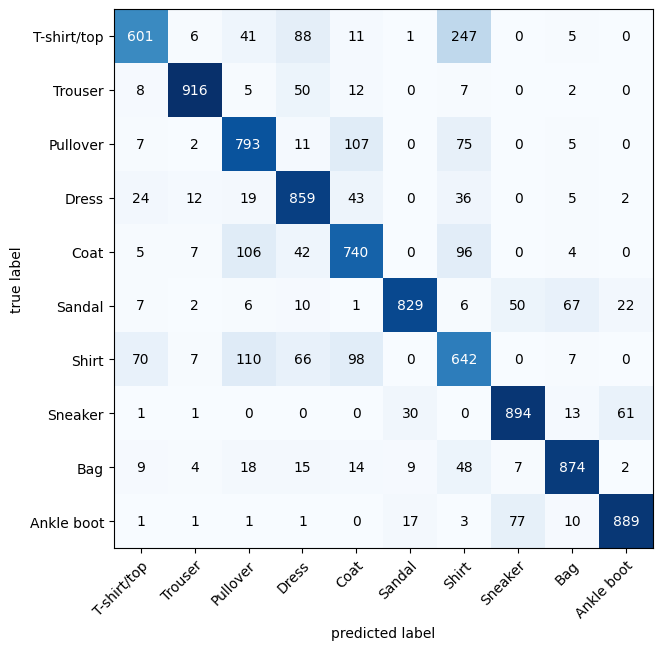

In [ ]:
import mlxtend
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. Setup confusion instance and compare predictions to targets
confmat = ConfusionMatrix(num_classes=len(class_names), task='multiclass')
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=test_data.targets)

# Plot the confusion matrix
fig, ax = plot_confusion_matrix(conf_mat=confmat_tensor.numpy(),
                                class_names=class_names,
                                figsize=(10,7))

## 11. Save and load a Trained model

In [ ]:
from pathlib import Path

# Create model directory path
MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents = True, exist_ok=True)

# Create model save path
MODEL_NAME = 'pytorch_computer_vision_model_cnn.pth'
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Save the model state dict
print(f'Saving model to: {MODEL_SAVE_PATH}')
torch.save(obj=model_2.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: models/pytorch_computer_vision_model_cnn.pth


In [ ]:
# Create a new instance of the model
loaded_model = FashionMNISTModelV2(input_shape=1,
                                   hidden_units=10,
                                   output_shape=len(class_names))

# Load in the save state_dict()
loaded_model.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

# Send the model to target device
loaded_model.to(device)

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [ ]:
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3182623088359833,
 'model_acc': 88.51837060702876}

In [ ]:
# Evaluate loaded model
torch.manual_seed(42)
loaded_model_results = eval_model(model=loaded_model,
                                  data_loader=test_dataloader,
                                  loss_fn=loss_fn,
                                  accuracy_fn=accuracy_fn)

loaded_model_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3182623088359833,
 'model_acc': 88.51837060702876}

In [ ]:
# Check if two results are close to each other
torch.isclose(torch.tensor(model_2_results['model_acc']),
              torch.tensor(loaded_model_results['model_acc']))

tensor(True)